In [1]:
import os 
from dotenv import load_dotenv
load_dotenv('C:/Users/midon/Documents/anomaly-detection-autoencoder-based-basic/.env.local')
PROJECT_PATH = os.getenv('PROJECT_PATH')
os.chdir(PROJECT_PATH)
# import sys
# sys.path.append(PROJECT_PATH)

import preprocessing.preprocessing as pp
from synthetic_data.get_run import *
from synthetic_data.vae import VariationalAutoencoder
from visualisation import compare_point_wise, compare_distribution_plot
from eval.evaluate_recon import evaluate_table
from visualisation import *
import matplotlib.pyplot as plt

In [10]:
run_id = "09a1ad7e73a04cb7836085c2fdac4ff1"
transformer = get_transformer_from_experiment(run_id)
X = transformer.df
synthetic_X = get_recon_transformed_data(run_id)

Inferred cat_dims from saved weights: 28


In [11]:
y = get_y_from_run(run_id)
synthetic_df = synthetic_X.copy()
synthetic_df['LOAN_DEFAULT'] = y
synthetic_df

Finished runs in experiment 479945333661072113: ['09a1ad7e73a04cb7836085c2fdac4ff1']


,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE_DESCRIPTION,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,AGE_DISBURSMENT,LOAN_DEFAULT
0,40601,54489,75.753685,Salaried,1,0,0,0,0,No Bureau History Available,...,3662,0,235,0,0,1,1,0,33,0
1,48108,67636,73.318344,Self employed,1,0,0,0,0,K-High Risk,...,2925,203,0,0,1,15,17,0,37,1
2,49594,58363,87.460167,Self employed,1,0,0,0,0,No Bureau History Available,...,2262,0,26,0,0,0,0,0,36,0
3,58006,69782,84.760735,Self employed,1,0,0,0,0,A-Very Low Risk,...,1857,2967,86,0,0,9,11,1,24,1
4,50457,62020,84.428894,Self employed,1,0,0,0,0,No Bureau History Available,...,961,2582,0,0,0,0,0,1,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,65309,103836,65.206268,Salaried,0,0,1,0,0,D-Very Low Risk,...,2551,13128,515,0,0,25,40,0,32,0
233150,74738,95257,80.374535,Self employed,0,0,1,0,0,A-Very Low Risk,...,1865,0,74,0,0,9,9,0,28,0
233151,35950,78586,46.938675,Salaried,1,0,0,0,0,No Bureau History Available,...,1005,0,47,0,0,0,0,0,39,0
233152,41745,75208,57.361233,Salaried,1,0,0,0,0,No Bureau History Available,...,1871,2177,16,0,0,0,0,0,27,0


In [4]:
# synthetic_df.to_csv('synthetic_data.csv', index=False)

In [12]:
eval_df = evaluate_table(transformer.df, synthetic_X, transformer.num_cols)
eval_df

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 30/30 [00:02<00:00, 10.22it/s]|
Column Shapes Score: 84.25%

(2/2) Evaluating Column Pair Trends: |██████████| 435/435 [00:17<00:00, 24.40it/s]|
Column Pair Trends Score: 97.39%

Overall Score (Average): 90.82%



,Column,SDV Metric,Column Shape Score,Wasserstein Similarity,Jensen-Shannon Similarity,R2,MAE
0,DISBURSED_AMOUNT,KSComplement,0.972988,0.99,0.9993,0.9349,2616.60
1,ASSET_COST,KSComplement,0.934661,0.99,0.9994,0.9455,3434.85
2,LTV,KSComplement,0.938135,0.99,0.9997,0.9205,2.54
3,EMPLOYMENT_TYPE,TVComplement,0.960914,NaN,NaN,NaN,NaN
4,AADHAR_FLAG,TVComplement,0.974673,NaN,NaN,NaN,NaN
5,PAN_FLAG,TVComplement,0.924440,NaN,NaN,NaN,NaN
6,VOTERID_FLAG,TVComplement,0.979957,NaN,NaN,NaN,NaN
7,DRIVING_FLAG,TVComplement,0.976771,NaN,NaN,NaN,NaN
8,PASSPORT_FLAG,TVComplement,0.997873,NaN,NaN,NaN,NaN
9,PERFORM_CNS_SCORE_DESCRIPTION,TVComplement,0.875713,NaN,NaN,NaN,NaN


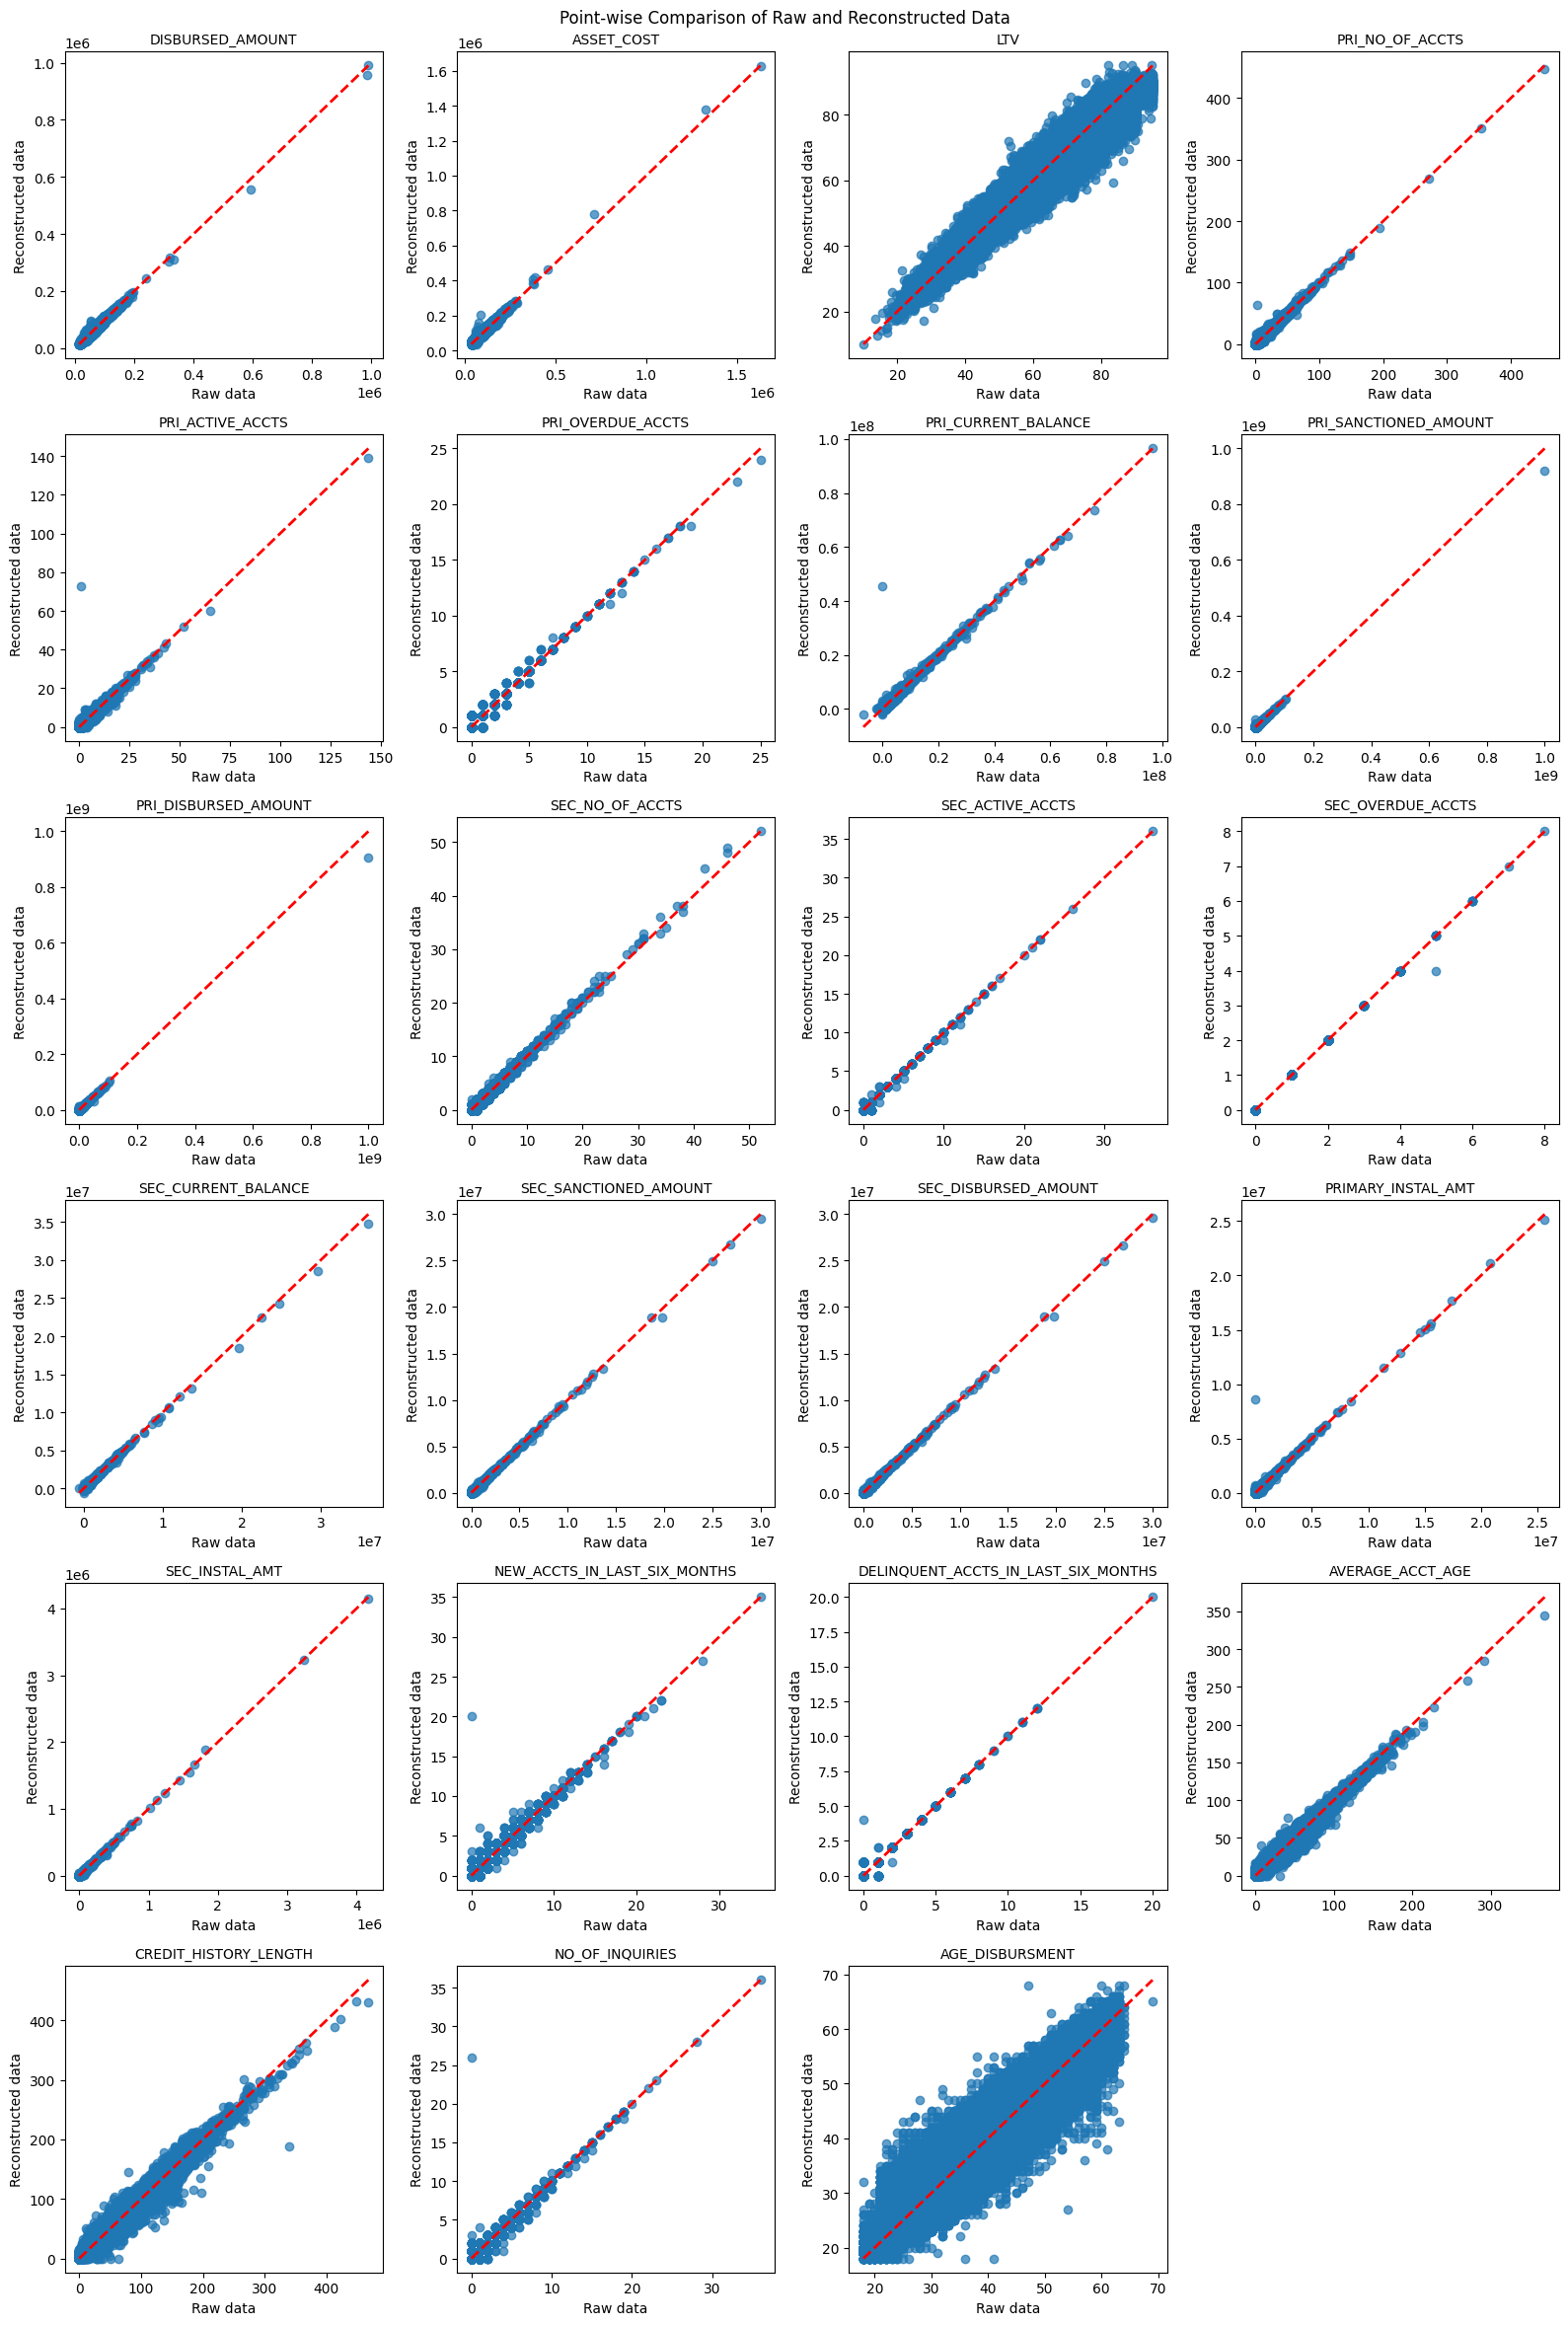

In [13]:
num_cols = transformer.num_cols
compare_point_wise(X, synthetic_df, num_cols)

C:\Users\midon\Documents\anomaly-detection-autoencoder-based-basic\visualisation.py:91: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


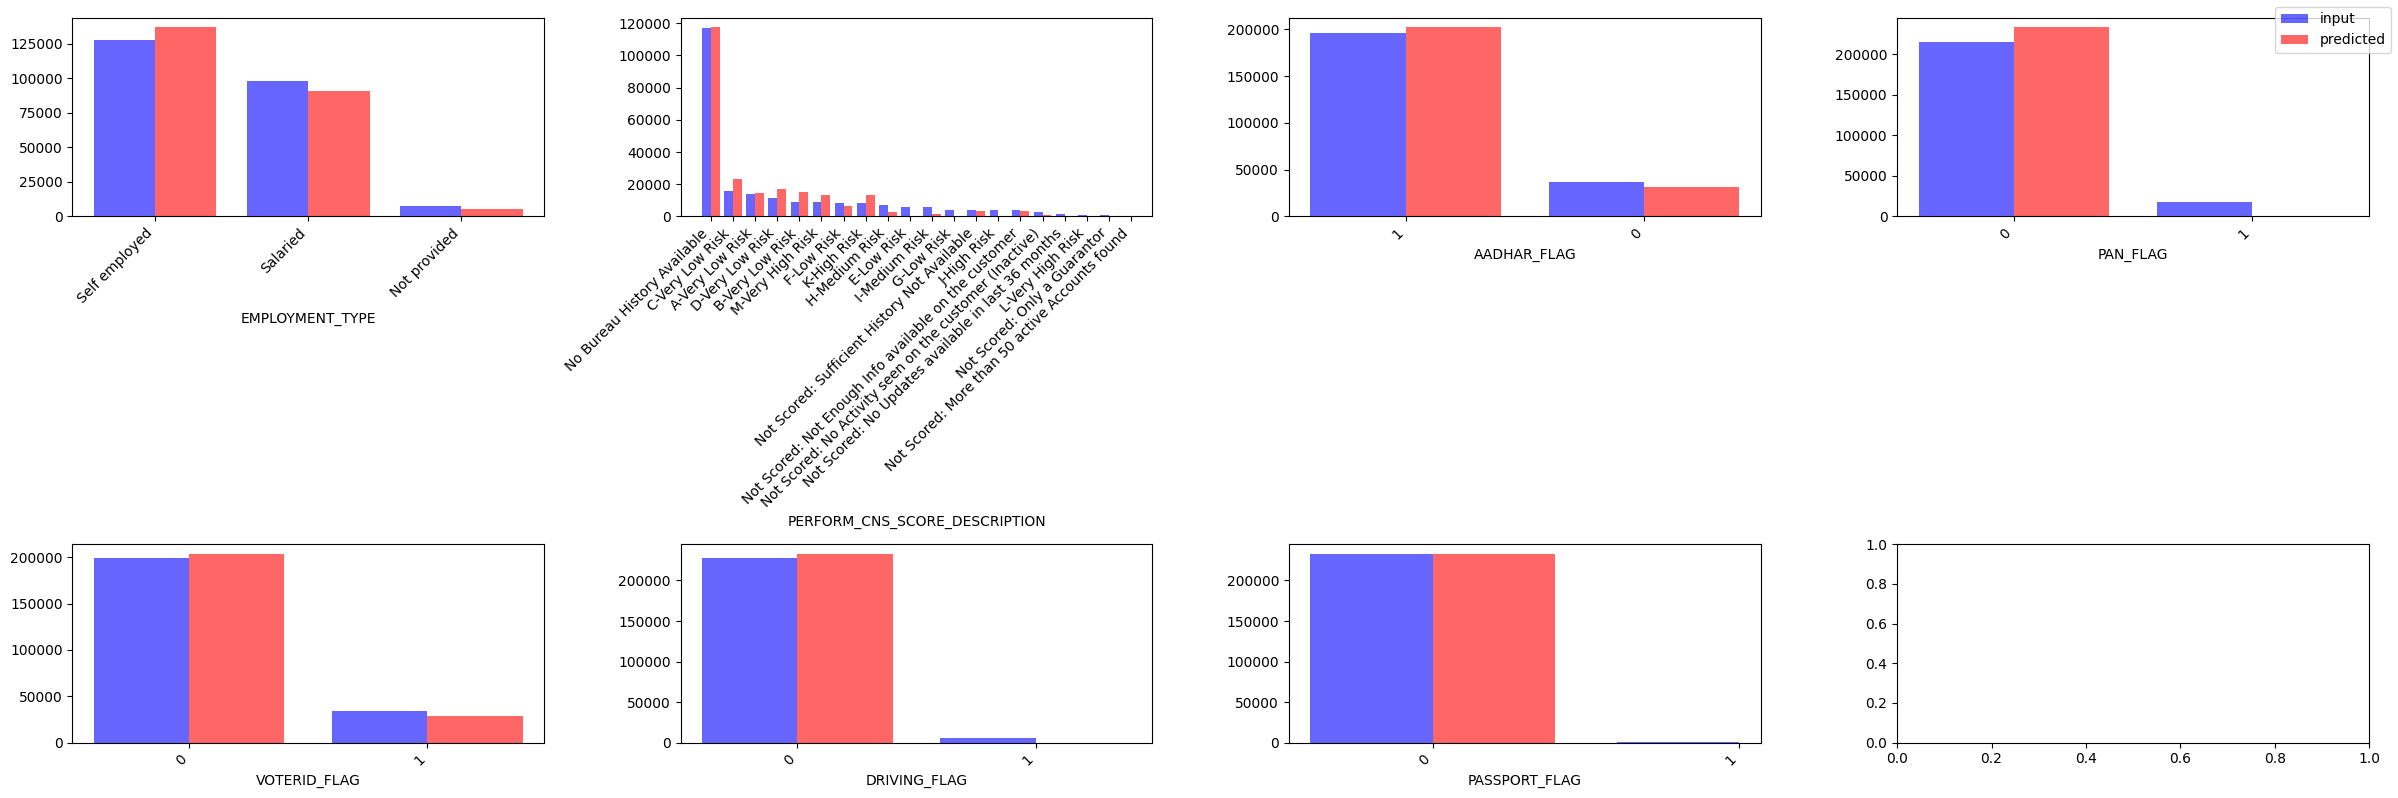

In [14]:
col_names = {'bool': transformer.bool_cols, 'cat': transformer.cat_cols}
compare_distribution_plot(col_names=col_names, X = X, pred_df=synthetic_df)

## Visualize the latent space to see if the default loans are outliers 

In [15]:
recon, z = get_reconstructed_data_from_run(run_id)
l2 = np.linalg.norm(z, axis = 1) 

Inferred cat_dims from saved weights: 28


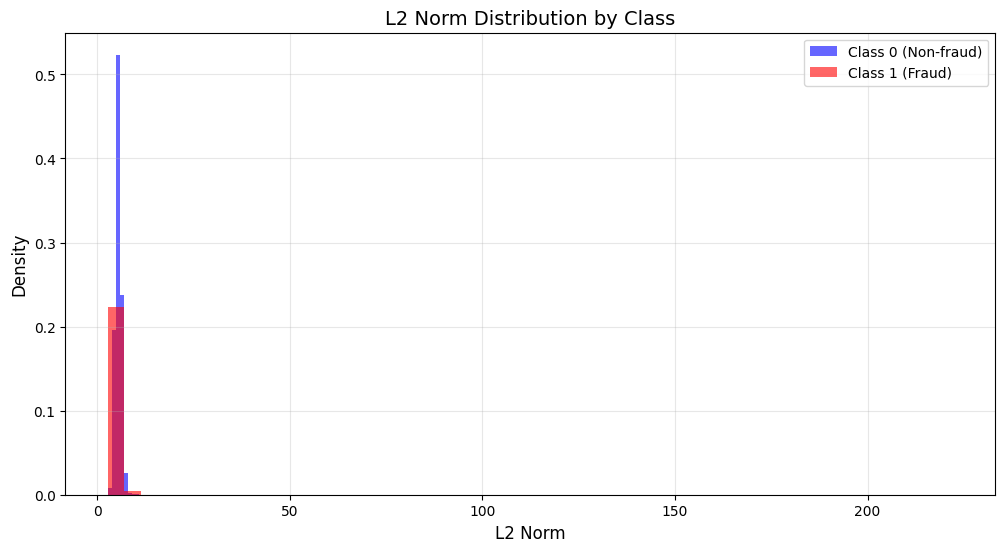

In [16]:
plt.figure(figsize=(12, 6))

l2_class_0 = l2[y == 0]
l2_class_1 = l2[y == 1]

plt.hist(l2_class_0, bins=50, alpha=0.6, label='Class 0 (Non-fraud)', color='blue', density=True)
plt.hist(l2_class_1, bins=50, alpha=0.6, label='Class 1 (Fraud)', color='red', density=True)

plt.xlabel('L2 Norm', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('L2 Norm Distribution by Class', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

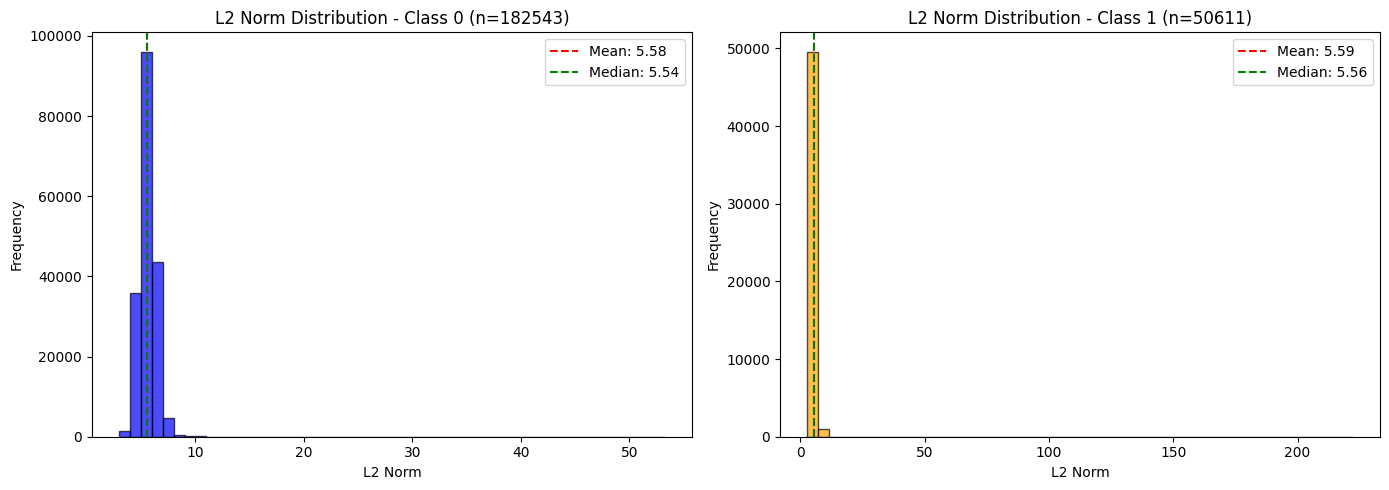

In [17]:
l2_class_0 = l2[y == 0]
l2_class_1 = l2[y == 1]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(l2_class_0, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title(f'L2 Norm Distribution - Class 0 (n={len(l2_class_0)})')
axes[0].set_xlabel('L2 Norm')
axes[0].set_ylabel('Frequency')
axes[0].axvline(np.mean(l2_class_0), color='red', linestyle='--', label=f'Mean: {np.mean(l2_class_0):.2f}')
axes[0].axvline(np.median(l2_class_0), color='green', linestyle='--', label=f'Median: {np.median(l2_class_0):.2f}')
axes[0].legend()


axes[1].hist(l2_class_1, bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[1].set_title(f'L2 Norm Distribution - Class 1 (n={len(l2_class_1)})')
axes[1].set_xlabel('L2 Norm')
axes[1].set_ylabel('Frequency')
axes[1].axvline(np.mean(l2_class_1), color='red', linestyle='--', label=f'Mean: {np.mean(l2_class_1):.2f}')
axes[1].axvline(np.median(l2_class_1), color='green', linestyle='--', label=f'Median: {np.median(l2_class_1):.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

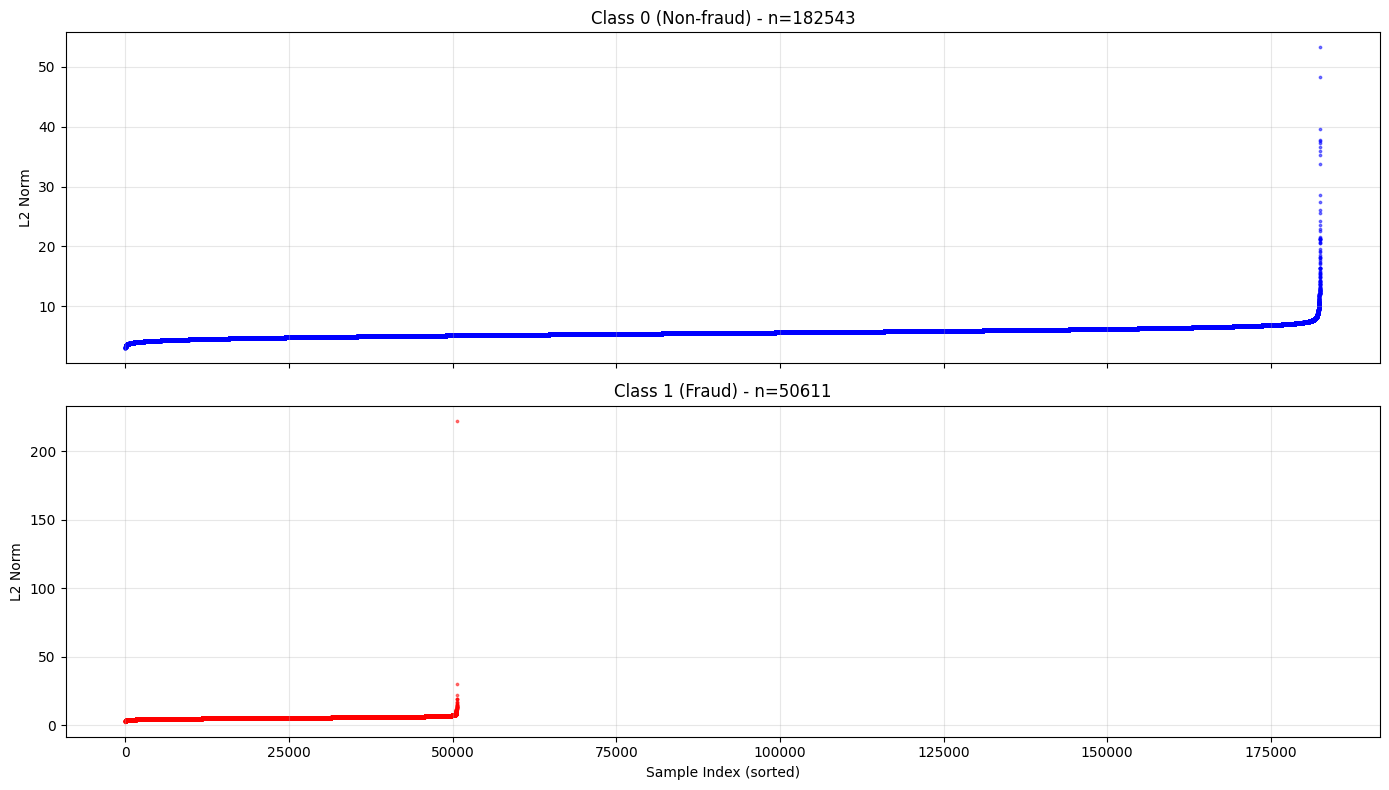

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot class 0
idx_0 = np.where(y == 0)[0]
l2_0 = l2[idx_0]
axes[0].scatter(range(len(l2_0)), np.sort(l2_0), c='blue', s=3, alpha=0.5)
axes[0].set_ylabel('L2 Norm')
axes[0].set_title(f'Class 0 (Non-fraud) - n={len(l2_0)}')
axes[0].grid(alpha=0.3)

# Plot class 1
idx_1 = np.where(y == 1)[0]
l2_1 = l2[idx_1]
axes[1].scatter(range(len(l2_1)), np.sort(l2_1), c='red', s=3, alpha=0.5)
axes[1].set_xlabel('Sample Index (sorted)')
axes[1].set_ylabel('L2 Norm')
axes[1].set_title(f'Class 1 (Fraud) - n={len(l2_1)}')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Random Forest
See if the a random forest trained on original data can also predict y with synthetic data.
<br>
Result: No,

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_transformed = transformer.transform_input()
y = pp.VehicleData().y
X_train, X_test, y_train, y_test = train_test_split(
        X_transformed, y, test_size=0.2, random_state=42
    )
# clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced_subsample', min_samples_split=10) # min_samples_split=5, min_samples_leaf=50)
#refit with hold out samples
# clf.fit(X_transformed, y)
# pred_original = clf.predict(X_transformed)

In [66]:
# train random forest so that it does not overfit
# hyperparameter tuning 
from eval.evaluate_recon import evaluate_metrics, confusion_matrix_metrics
cols = ['n_estimators', 'min_samples_split', 'F1_Score', 'Precision','Recall','Accuracy', 'F1_Score_test',  'Precision_test','Recall_test','Accuracy_test']
tuning_df = pd.DataFrame(columns=cols)
n_estimators_list = [100, 200, 300, 400]
min_samples_split_list = [4,8,10,12]
for n_estimators in n_estimators_list:
    for min_samples_split in min_samples_split_list:
        rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42, class_weight='balanced_subsample', min_samples_split=min_samples_split)
        rf.fit(X_train, y_train)
        pred_train = rf.predict(X_train)
        pred_test = rf.predict(X_test)
        f1, prec, recall, acc = evaluate_metrics(pred_labels = pred_train, real_labels = y_train)
        f1_test, prec_test, recall_test, acc_test = evaluate_metrics(pred_labels = pred_test, real_labels = y_test)
        new_row = {
            'n_estimators': n_estimators,
            'min_samples_split': min_samples_split,
            'F1_Score': f1,
            'Precision': prec,
            'Recall': recall,
            'Accuracy': acc,
            'F1_Score_test': f1_test,
            'Precision_test': prec_test,
            'Recall_test': recall_test,
            'Accuracy_test': acc_test
        }
        tuning_df = pd.concat([tuning_df, pd.DataFrame([new_row])], ignore_index=True)

F1 Score: 0.9965, Precision: 0.9951, Recall: 0.9979, Accuracy: 0.9985
F1 Score: 0.1173, Precision: 0.3349, Recall: 0.0711, Accuracy: 0.767


C:\Users\midon\AppData\Local\Temp\ipykernel_16596\126311868.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tuning_df = pd.concat([tuning_df, pd.DataFrame([new_row])], ignore_index=True)


F1 Score: 0.9746, Precision: 0.9728, Recall: 0.9764, Accuracy: 0.989
F1 Score: 0.178, Precision: 0.3317, Recall: 0.1216, Accuracy: 0.7554
F1 Score: 0.9564, Precision: 0.954, Recall: 0.9588, Accuracy: 0.981
F1 Score: 0.2018, Precision: 0.3341, Recall: 0.1446, Accuracy: 0.751
F1 Score: 0.9365, Precision: 0.9324, Recall: 0.9406, Accuracy: 0.9723
F1 Score: 0.2223, Precision: 0.333, Recall: 0.1668, Accuracy: 0.7458
F1 Score: 0.9973, Precision: 0.9953, Recall: 0.9994, Accuracy: 0.9988
F1 Score: 0.1161, Precision: 0.345, Recall: 0.0698, Accuracy: 0.7686
F1 Score: 0.9802, Precision: 0.9758, Recall: 0.9847, Accuracy: 0.9914
F1 Score: 0.1723, Precision: 0.3298, Recall: 0.1166, Accuracy: 0.756
F1 Score: 0.9632, Precision: 0.9582, Recall: 0.9683, Accuracy: 0.984
F1 Score: 0.2002, Precision: 0.3367, Recall: 0.1424, Accuracy: 0.7522
F1 Score: 0.9431, Precision: 0.9372, Recall: 0.9491, Accuracy: 0.9752
F1 Score: 0.2167, Precision: 0.3304, Recall: 0.1612, Accuracy: 0.7462
F1 Score: 0.9976, Precision: 

In [67]:
#search for set of hyperparams that work well in test set
tuning_df

,n_estimators,min_samples_split,F1_Score,Precision,Recall,Accuracy,F1_Score_test,Precision_test,Recall_test,Accuracy_test
0,100,4,0.996544,0.995144,0.997948,0.998499,0.117303,0.334879,0.071105,0.766979
1,100,8,0.974637,0.972837,0.976444,0.988977,0.177992,0.331722,0.121627,0.755377
2,100,10,0.956397,0.953987,0.958820,0.981037,0.201815,0.334092,0.144574,0.750981
3,100,12,0.936519,0.932446,0.940628,0.972341,0.222295,0.333006,0.166831,0.745813
4,200,4,0.997336,0.995274,0.999407,0.998842,0.116144,0.345012,0.069825,0.768587
5,200,8,0.980218,0.975776,0.984700,0.991379,0.172293,0.329805,0.116604,0.756042
6,200,10,0.963218,0.958153,0.968337,0.983959,0.200152,0.336671,0.142407,0.752161
7,200,12,0.943105,0.937155,0.949131,0.975161,0.216706,0.330440,0.161217,0.746220
8,300,4,0.997570,0.995495,0.999654,0.998944,0.114587,0.349047,0.068544,0.769338
9,300,8,0.981939,0.976882,0.987048,0.992124,0.173703,0.336256,0.117097,0.757415


In [54]:
# from eval.evaluate_recon import evaluate_metrics, confusion_matrix_metrics
clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced_subsample', min_samples_split=10) # min_samples_split=5, min_samples_leaf=50)
# refit with hold out samples
clf.fit(X_transformed, y)
pred_original = clf.predict(X_transformed)
evaluate_metrics(pred_labels = pred_original, real_labels = y)
confusion_matrix_metrics(pred_labels = pred_original, real_labels = y)

F1 Score: 0.9623, Precision: 0.958, Recall: 0.9667, Accuracy: 0.9836
TN: 180396, FP: 2147, FN: 1683, TP: 48928


(180396, 2147, 1683, 48928)

In [57]:
synthetic_array, z = get_reconstructed_data_from_run(run_id)
pred_synthetic = clf.predict(synthetic_array)

Inferred cat_dims from saved weights: 28


In [58]:
evaluate_metrics(pred_labels = pred_synthetic, real_labels = y)
confusion_matrix_metrics(pred_labels = pred_synthetic, real_labels = y)

F1 Score: 0.1393, Precision: 0.3742, Recall: 0.0856, Accuracy: 0.7704
TN: 175298, FP: 7245, FN: 46278, TP: 4333


(175298, 7245, 46278, 4333)